downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg
[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


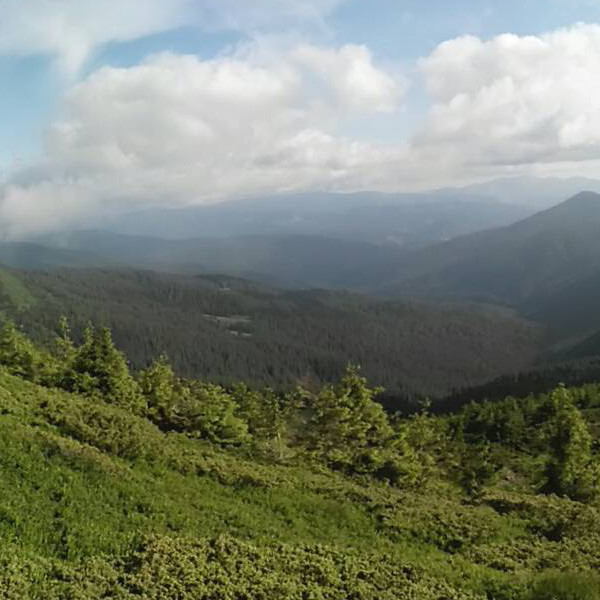

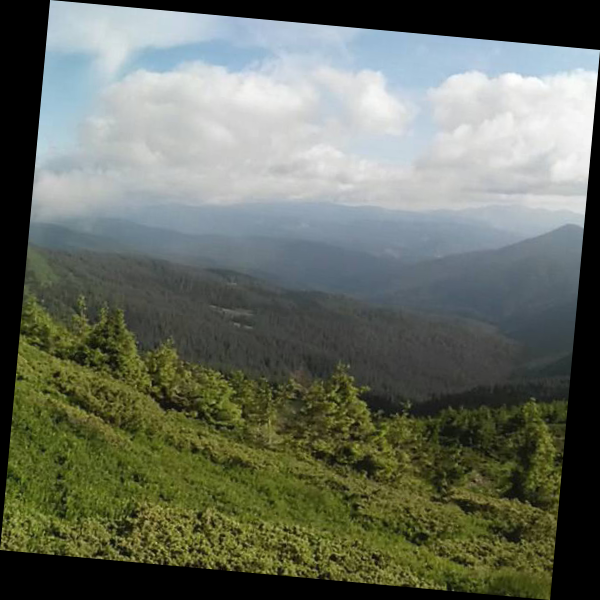

In [2]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

# implement this function
M = cv2.getAffineTransform(pts1,pts2)
print(M)

dst = cv2.warpAffine(img,M,img.shape[:2])
cv2_imshow(img)
cv2_imshow(dst)




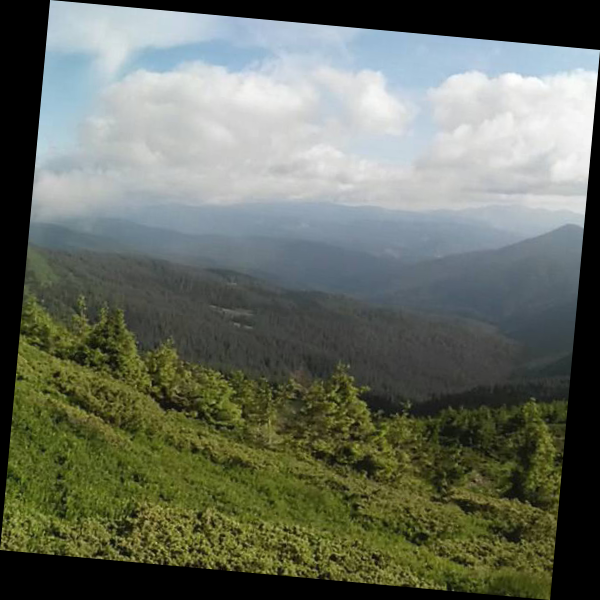

In [4]:
def affine(pts1, pts2):
  A = np.zeros((6,6))

  A[0] = np.concatenate((np.array(pts1[0]),np.array([0, 0, 1, 0])))
  A[1] = np.concatenate((np.zeros(2), np.array(pts1[0]), np.array([0, 1])))
  
  A[2] = np.concatenate((np.array(pts1[1]),np.array([0, 0, 1, 0])))
  A[3] = np.concatenate((np.zeros(2), np.array(pts1[1]), np.array([0, 1])))
  
  A[4] = np.concatenate((np.array(pts1[2]),np.array([0, 0, 1, 0])))
  A[5] = np.concatenate((np.zeros(2), np.array(pts1[2]), np.array([0, 1])))
  
  b = np.array(pts2).flatten()
  
  x = np.linalg.inv(A) @ b
  
  M = np.array([[x[0], x[1], x[4]], [x[2], x[3], x[5]]])
  
  return M
  
M_my = affine(pts1, pts2)

dst = cv2.warpAffine(img,M_my,img.shape[:2])

cv2_imshow(dst)